In [7]:
# --- 1. Installation and Dependencies ---
print("--- Installing Dependencies ---")
!pip install dlib imutils
import cv2
import dlib
import numpy as np
import imutils
from google.colab.patches import cv2_imshow # Necessary for displaying images in Colab

# --- 2. Model Download and Path Definition ---
print("--- Downloading Facial Landmark Model (68 points) ---")
# The pre-trained shape predictor file is downloaded and unzipped.
!wget -nc http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# Define the path variable which caused the previous error
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
print(f"Model file path defined: {PREDICTOR_PATH}")

# --- 3. Dlib Object Initialization ---
# 3a. Face Detector (HOG + Linear SVM)
detector = dlib.get_frontal_face_detector()
print("Dlib HOG Face Detector loaded.")

# 3b. Landmark Predictor (Ensemble of Regression Trees)
# This uses the PREDICTOR_PATH variable defined above.
predictor = dlib.shape_predictor(PREDICTOR_PATH)
print("68-Point Shape Predictor model loaded.")

--- Installing Dependencies ---
--- Downloading Facial Landmark Model (68 points) ---
File ‘shape_predictor_68_face_landmarks.dat.bz2’ already there; not retrieving.

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.
Model file path defined: shape_predictor_68_face_landmarks.dat
Dlib HOG Face Detector loaded.
68-Point Shape Predictor model loaded.


In [8]:
# --- Utility Function 1: dlib Rect to OpenCV Bounding Box ---
def rect_to_bb(rect):
    """
    Converts a dlib rectangle object to an OpenCV-compatible bounding box
    tuple (x, y, w, h).
    """
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

# --- Utility Function 2: dlib Shape to NumPy Array ---
def shape_to_np(shape, dtype="int"):
    """
    Converts the dlib shape object (68 individual points) into a 68x2
    NumPy array of (x, y) coordinates.
    """
    coords = np.zeros((shape.num_parts, 2), dtype=dtype)
    for i in range(0, shape.num_parts):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

print("Data transformation utility functions defined.")

Data transformation utility functions defined.


In [9]:
def process_image_for_landmarks(image_path):

    # --- STEP 1: Image Loading (cv2.imread) ---
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}. Please check file name.")
        return

    # Resize the image for consistent and faster processing
    image = imutils.resize(image, width=500)
    display_image = image.copy()
    print(f"Image loaded and resized: {image.shape[1]}x{image.shape[0]}.")

    # --- STEP 2: Preprocessing (cv2.cvtColor) ---
    # Convert to grayscale for dlib's detector efficiency
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Image converted to grayscale.")

    # --- STEP 3: Face Detection (dlib detector) ---
    # The '1' argument means upsample the image once to find smaller faces
    print("Detecting faces...")
    rects = detector(gray, 1)

    # --- Loop through detected faces for Landmark Prediction and Drawing ---
    for (i, rect) in enumerate(rects):

        # --- STEP 4: Landmark Prediction (dlib predictor) ---
        shape = predictor(gray, rect)
        shape_coords = shape_to_np(shape) # NumPy array of (x, y) points

        # Convert dlib rect to standard (x, y, w, h) box
        (x, y, w, h) = rect_to_bb(rect)

        # --- STEP 5: Drawing Results (cv2.rectangle, cv2.circle) ---

        # Draw the Bounding Box (Green)
        cv2.rectangle(display_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Draw all 68 Landmarks (Red filled circles)
        for (coord_x, coord_y) in shape_coords:
            # cv2.circle(image, center, radius, color, thickness)
            cv2.circle(display_image, (coord_x, coord_y), 1, (0, 0, 255), -1)

    # --- STEP 6: Display Final Result (cv2_imshow) ---
    print(f"Processing finished. Detected and marked landmarks on {len(rects)} face(s).")
    cv2_imshow(display_image)

Saving photoFaceLab5-.jpg to photoFaceLab5-.jpg
Successfully uploaded: photoFaceLab5-.jpg
Image loaded and resized: 500x750.
Image converted to grayscale.
Detecting faces...
Processing finished. Detected and marked landmarks on 1 face(s).


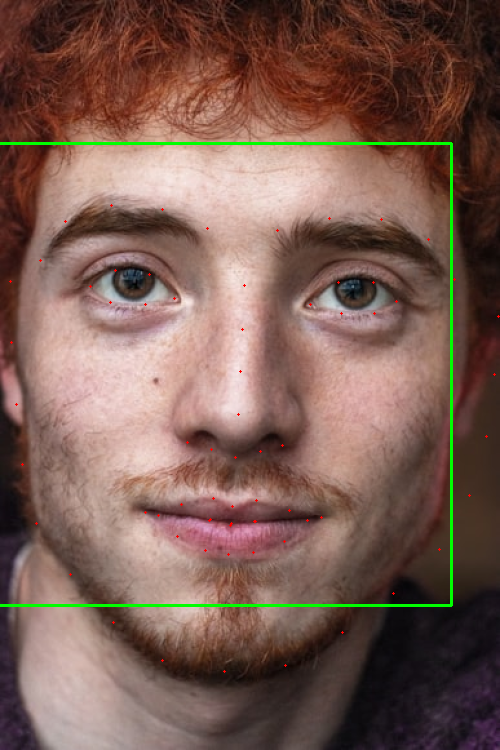

In [12]:
# Alternative Upload Cell (Run this instead of manually uploading)
from google.colab import files
uploaded = files.upload()

# The keys in the 'uploaded' dictionary are the file names.
# Get the first uploaded file name and use it for the pipeline.
if uploaded:
    uploaded_file_name = list(uploaded.keys())[0]
    print(f"Successfully uploaded: {uploaded_file_name}")

    # Run the pipeline with the confirmed file name
    process_image_for_landmarks(uploaded_file_name)
else:
    print("No file was uploaded. Please try again.")








